# Classifying Traffic Signs
***
## Background
As research continues in the development of self-driving cars, one of the key challenges is computer vision, allowing these cars to develop an understanding of their environment from digital images. In particular, this involves the ability to recognize and distinguish road signs – stop signs, speed limit signs, yield signs, and more.

In this project, we will use `TensorFlow` to build a Convolutional Neural Network `(CNN)` to classify road signs based on an image of those signs. To do so, we will use the <a href='https://benchmark.ini.rub.de/?section=gtsrb&subsection=news'>German Traffic Sign Recognition Benchmark</a> (GTSRB) dataset, which contains `43` different kinds of road signs with more than `26,000` images in total.

__NB!__ This project is done for educational purposes only.
## Outcomes
We have built and trained the CNN on the <a href='https://benchmark.ini.rub.de/?section=gtsrb&subsection=news'>German Traffic Sign Recognition Benchmark</a> (GTSRB) dataset. The resulting accuracy of the trained model on a test sample is `98.92%`.

In [170]:
import cv2
import numpy as np
import os
import sys
import tensorflow as tf

import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt

## Loading Data

Let's first define a `load_data` function that should accept as an argument `data_dir`, representing the path to a directory where the data is stored, and return image arrays and labels for each image in the data set. We assume that `data_dir` will contain one directory named after each category, numbered `0` through `NUM_CATEGORIES - 1`. 

The function will return a tuple `(images, labels)`. `images` will be a list of all of the images in the data set, where each image is represented as a numpy.ndarray of the appropriate size. `labels` will be a list of integers, representing the category number for each of the corresponding images in the images list.

In [93]:
def load_data(data_dir):
    """
    Load image data from directory `data_dir`.

    Return tuple `(images, labels)`. `images` is a list of all
    of the images in the data directory, where each image is formatted as a
    numpy ndarray with dimensions IMG_WIDTH x IMG_HEIGHT x 3. `labels` is
    a list of integer labels, representing the categories for each of the
    corresponding `images`.
    
    """
    images = list()
    labels = list()
    
    for сategory in os.scandir(data_dir):
        if not сategory.name.startswith('.'):
            for image in os.scandir(сategory):
                img = cv2.imread(image.path, 1)
                img_resized = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_AREA)
                images.append(img_resized)
                labels.append(int(сategory.name))
            
    return images, labels

Let's choose `9` random images from our dataset and have a quick look at them.

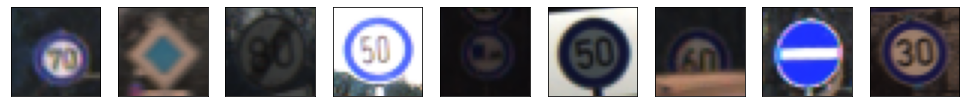

In [150]:
img_examples = random.sample(list(range(0,len(images))), 9)

fig = plt.figure(figsize =(17,11))
for i in range(1,10):
    ax = fig.add_subplot(1, 9, i)
    ax.imshow(images[img_examples[i-1]])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Based on what we see, we can conclude that __the dataset images are likely to have varying degrees of illumination and occlusion.__ We can also assume that __the images are captured from different viewpoints__. Therefore, this particular dataset may potentially represent real-world conditions with high accuracy. We can also assume that overfitting may not be harmful in our case. Given that our data sample represents our entire population, higher accuracy is likely to result in a better model's performance in the real world. 

## Building a model

As we deal with the image classification, we will build a `Convolutional Neural Network`. As we can see from the picture below, all the components of a `CNN` can be divided into two functional groups – they either ensure feature learning or enable classification. 

For the feature learning problem, we have three core operations:
- __Convolution__: applying filters to detect and extract features from images
- __Non-linearity__: ReLU activation
- __Pooling__: downsampling operation on each feature map (i.e., reducing the spatial size of the feature maps to  downsample irrelevant spatial information)

As for the classification, we add a fully-connected layer (__Dense layer__) that takes extracted features and outputs probability calculated with the Softmax function for each class.

Let's write the `get_model()` function that should return a compiled neural network model.

![Image CNN](https://miro.medium.com/max/2000/1*vkQ0hXDaQv57sALXAJquxA.jpeg)

In [86]:
def get_model():
    """
    Returns a compiled CNN model. 
    The input_shape of the first layer is (IMG_WIDTH, IMG_HEIGHT, 3).
    The output layer has NUM_CATEGORIES units, one for each category.
    
    """
    # Create a convolutional neural network 
    model = tf.keras.models.Sequential([

        # First convolutional layer. Learn 32 filters using a 3x3 kernel
        tf.keras.layers.Conv2D(
            32, (3, 3), activation="relu", input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)
        ),
        
        # Max-pooling layer. Downsample 32 feature maps using 2x2 pool size
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        
        # Second convolutional layer. Learn 64 filters using a 3x3 kernel
        tf.keras.layers.Conv2D(
            64, (3, 3), activation="relu", input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)
        ),
        
        # Max-pooling layer. Downsample 64 feature maps using 2x2 pool size
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
        # Flatten units into a single vector
        tf.keras.layers.Flatten(),
        # Add fully-conected layer
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dropout(0.4),
    
        # Add an output layer with output units for all NUM_CATEGORIES
        tf.keras.layers.Dense(NUM_CATEGORIES, activation="softmax")
    ])
    
    # Compile neural network
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    
    return model

## Training a model
Since we have built and compiled our `CNN`, we can start training it. 

In [6]:
EPOCHS = 10
IMG_WIDTH = 30
IMG_HEIGHT = 30
NUM_CATEGORIES = 43
TEST_SIZE = 0.4

data_directory = 'gtsrb'

# Get image arrays and labels for all image files
images, labels = load_data(data_directory)

# Split data into training and testing sets
labels = tf.keras.utils.to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(
    np.array(images), np.array(labels), test_size=TEST_SIZE
)

# Get a compiled neural network
model = get_model()

# Fit model on training data
model.fit(x_train, y_train, epochs=EPOCHS)

# Save model to file
filename = 'trained_model'
model.save(filename)
print(f"Model saved to {filename}")

Epoch 1/10
15984/15984 [==============================] - 27s 2ms/step - loss: 1.9037 - acc: 0.6248
Epoch 2/10
15984/15984 [==============================] - 27s 2ms/step - loss: 0.3719 - acc: 0.8961
Epoch 3/10
15984/15984 [==============================] - 25s 2ms/step - loss: 0.2418 - acc: 0.9344
Epoch 4/10
15984/15984 [==============================] - 24s 2ms/step - loss: 0.2071 - acc: 0.9436
Epoch 5/10
15984/15984 [==============================] - 25s 2ms/step - loss: 0.1660 - acc: 0.9531
Epoch 6/10
15984/15984 [==============================] - 25s 2ms/step - loss: 0.1996 - acc: 0.9511
Epoch 7/10
15984/15984 [==============================] - 26s 2ms/step - loss: 0.1203 - acc: 0.9672
Epoch 8/10
15984/15984 [==============================] - 26s 2ms/step - loss: 0.1094 - acc: 0.9723
Epoch 9/10
15984/15984 [==============================] - 26s 2ms/step - loss: 0.1323 - acc: 0.9687
Epoch 10/10
15984/15984 [==============================] - 26s 2ms/step - loss: 0.1190 - acc: 0.9718

As we can see above, we have completed `10` training epochs. This particular number of epochs means that our learning algorithm have worked through the entire training dataset `10` times.

## Testing a model
Let's finally test our trained model.

In [154]:
# Load the trained neural network
model = tf.keras.models.load_model('trained_model')

# Evaluate the trained neural network
model.evaluate(x_test, y_test)[1]

10656/10656 [==============================] - 5s 462us/step


0.9892079579579579

The number above shows that the __rough accuracy of the model is almost__ `99%`. It might signify that __we probably have overfitting__. If we would like to handle it, one of the easiest __solutions would be to decrease the number of training epochs__. 

Let's also calculate `F1-score`. If its value is significantly lower, that our model tends to misclassify for certain classes more.

In [175]:
predictions = model.predict_classes(x_test)
f1 = f1_score(np.argmax(y_test, -1), predictions, average='macro')
f1

0.9880074017241274

__The difference between these two performance metrics is negligible__. Therefore, __the model can recognise and classify all the road signs in our dataset with equal accuracy__.